In [74]:
# Import libraries
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import kaleido
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objects as go
import plotly.offline as pyo

In [3]:
# set seed
np.random.seed(1)

In [4]:
# Load dataset
country_data =pd.read_csv("country_data.csv")
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
country_data_neumeric = country_data.drop(columns=["country"])
country_data_neumeric.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Preliminary Exploratory Data Analysis

In [18]:
# mean, standard deviation, minimum, quartiles, maximum
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
sns.set(font_scale=1)

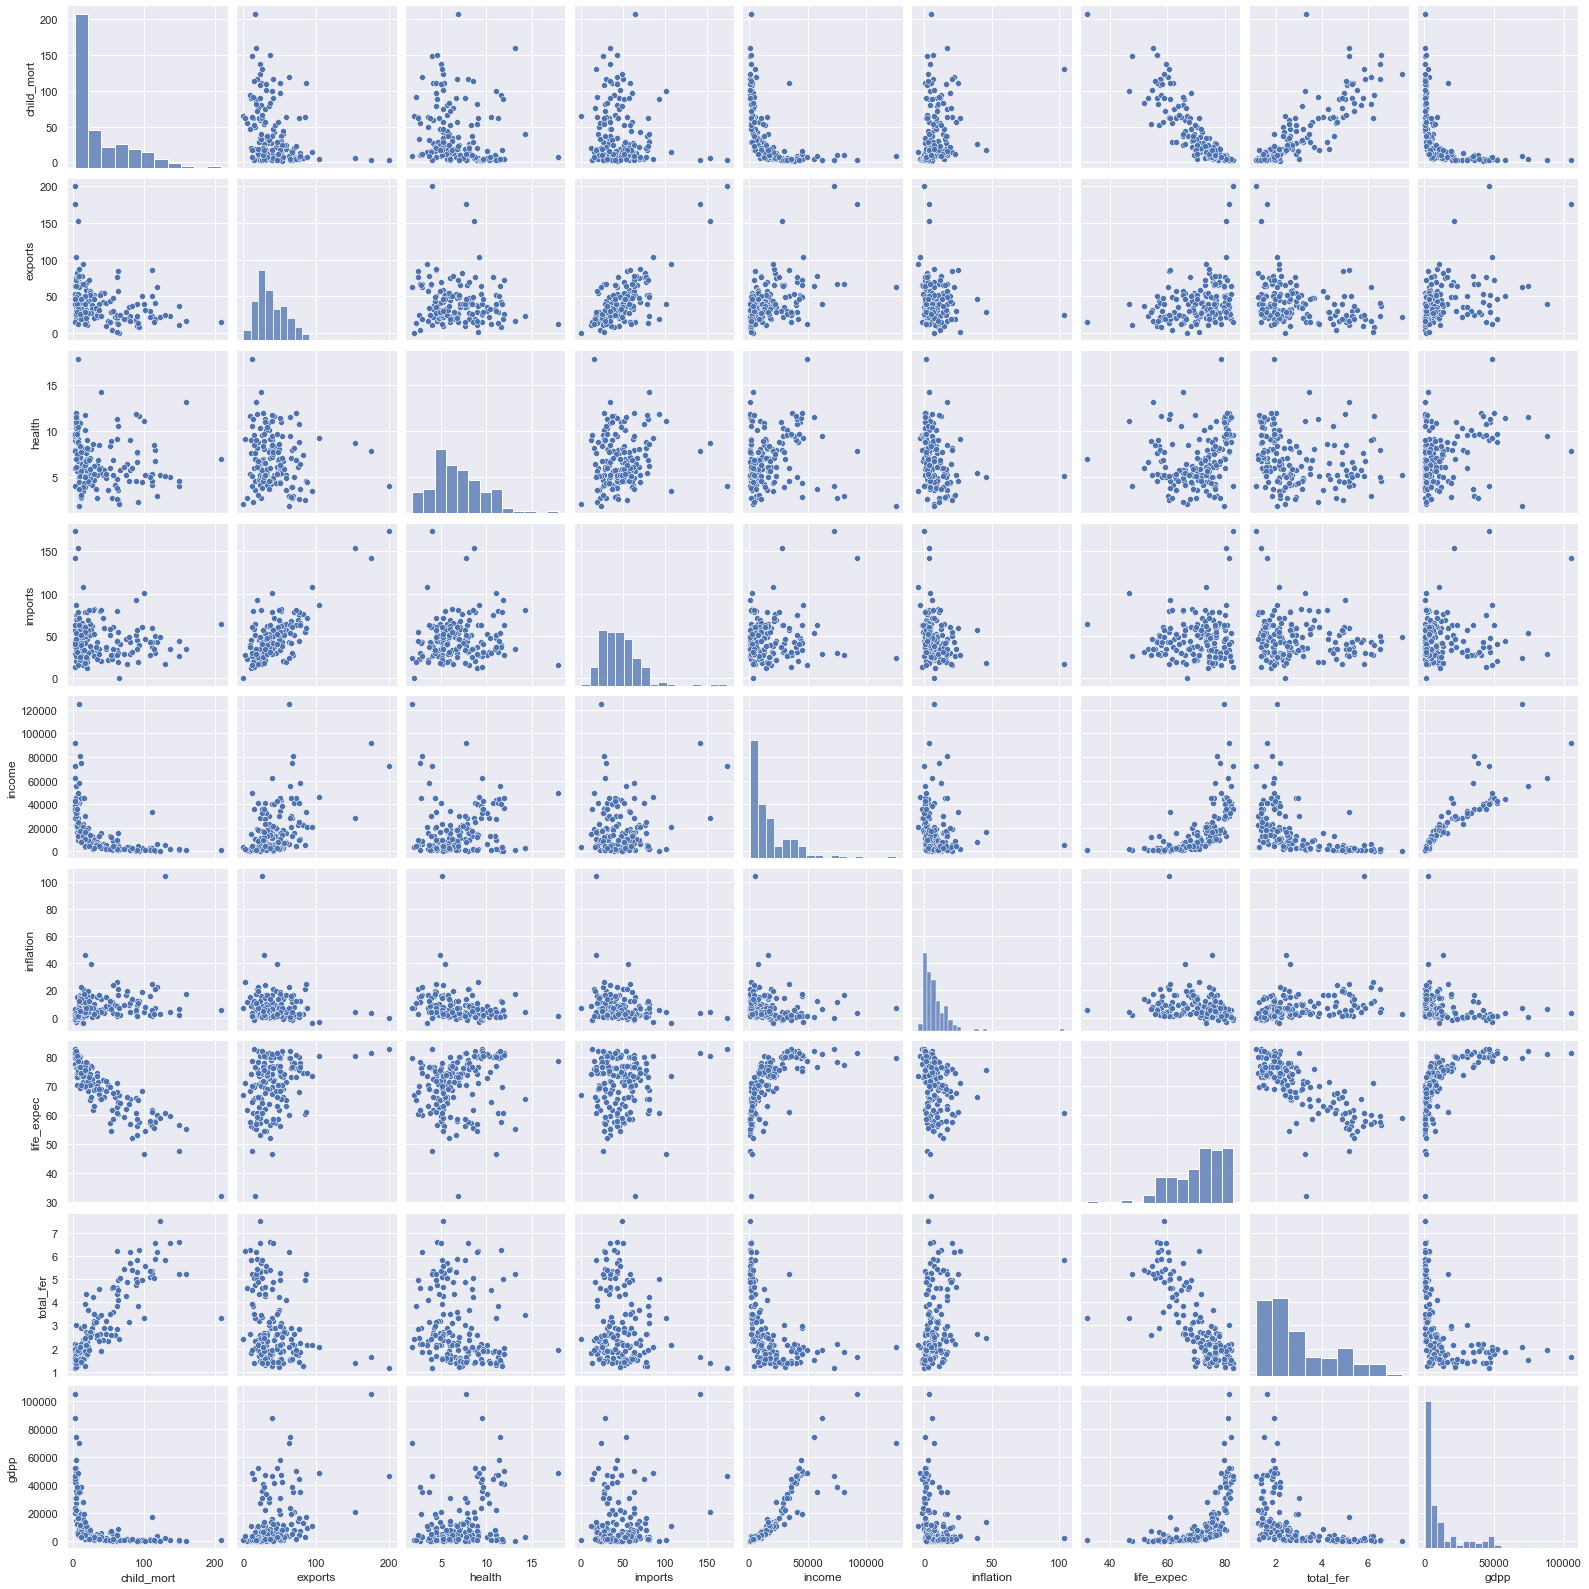

In [25]:
# Matrix plot for correlations between neumerical variables and histogram on each variable
sns.pairplot(country_data_neumeric)

In [28]:
scaler = StandardScaler()
standardized_data = pd.DataFrame(
    scaler.fit_transform(country_data_neumeric), columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp'])
standardized_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [49]:
# Try 1 to 30 clusters
country_clust_ks = pd.DataFrame({"k": np.array(range(1, 31))})
country_clust_ks.head()

,k
0,1
1,2
2,3
3,4
4,5


In [50]:
# Models for k_means algorithm on 1~30 clusters, run each of them 10 times
country_clust_ks = country_clust_ks.assign(
    country_clust = country_clust_ks['k'].apply(
        lambda x: KMeans(n_clusters=x, n_init=10, init="random").fit(standardized_data)
    )
)
country_clust_ks.head()

,k,country_clust
0,1,"KMeans(init='random', n_clusters=1)"
1,2,"KMeans(init='random', n_clusters=2)"
2,3,"KMeans(init='random', n_clusters=3)"
3,4,"KMeans(init='random', n_clusters=4)"
4,5,"KMeans(init='random', n_clusters=5)"


In [51]:
# Compute the total squared distance from observations to centroid, and the number of iterations ran
country_clust_ks = country_clust_ks.assign(
    WSSD = country_clust_ks["country_clust"].apply(lambda x: x.inertia_),
    num_iteration = country_clust_ks["country_clust"].apply(lambda x: x.n_iter_)
)
country_clust_ks.head()

,k,country_clust,WSSD,num_iteration
0,1,"KMeans(init='random', n_clusters=1)",1503.000000,2
1,2,"KMeans(init='random', n_clusters=2)",1050.214558,5
2,3,"KMeans(init='random', n_clusters=3)",831.424435,6
3,4,"KMeans(init='random', n_clusters=4)",700.703326,7
4,5,"KMeans(init='random', n_clusters=5)",639.383566,20


In [52]:
# Drop the k_means models 
country_clust_ks = country_clust_ks.drop(columns = ["country_clust"])
country_clust_ks.head()

,k,WSSD,num_iteration
0,1,1503.000000,2
1,2,1050.214558,5
2,3,831.424435,6
3,4,700.703326,7
4,5,639.383566,20


In [53]:
# Elbow plot for finding best K

elbow_plot = (
    alt.Chart(country_clust_ks)
    .mark_line(point=True)
    .encode(
        x=alt.X("k", title="Number of clusters"),
        y=alt.Y("WSSD", title="within-cluster sum-of-squared-distances"),
    )
    .properties(width = 300, height = 500)
)
elbow_plot

alt.Chart(...)

It looks like 3 cluasters would be a good choice. 

## Clustering

In [35]:
# Model for k_means using 3 clusters, run 10 times
country_data_clust = KMeans(n_clusters=3, n_init=10, init="random").fit(standardized_data)
country_data_clust

KMeans(init='random', n_clusters=3)

In [36]:
# Print WSSD, cluster centers, and number of iterations
print(f"WSSD : {country_data_clust.inertia_}")
print(f"Cluster Centers : {country_data_clust.cluster_centers_}")
print(f"Number of iterations : {country_data_clust.n_iter_}")

WSSD : 831.4244352086874
Cluster Centers : [[-0.40645337 -0.03165259 -0.2244709   0.02416161 -0.25177041 -0.01716742
   0.25473362 -0.42434279 -0.35448141]
 [-0.82744866  0.64507985  0.72741122  0.19063895  1.48424268 -0.48492064
   1.07957853 -0.79187687  1.61599536]
 [ 1.36021776 -0.43753313 -0.15598401 -0.18920377 -0.68689408  0.40211078
  -1.28217981  1.36494385 -0.60424243]]
Number of iterations : 10


In [37]:
# Predict the group of each country
predictions = country_data_clust.predict(standardized_data)
predictions

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

In [70]:
# Add the grouping results to original dataset
clustered_data = country_data.assign(cluster = predictions)
pd.set_option('display.max_rows',200)
clustered_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [39]:
# Concatenate the cluster column to standardized data for visualization
clustered_data_standardized = standardized_data.assign(cluster = predictions)
clustered_data_standardized.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,2
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,2
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0


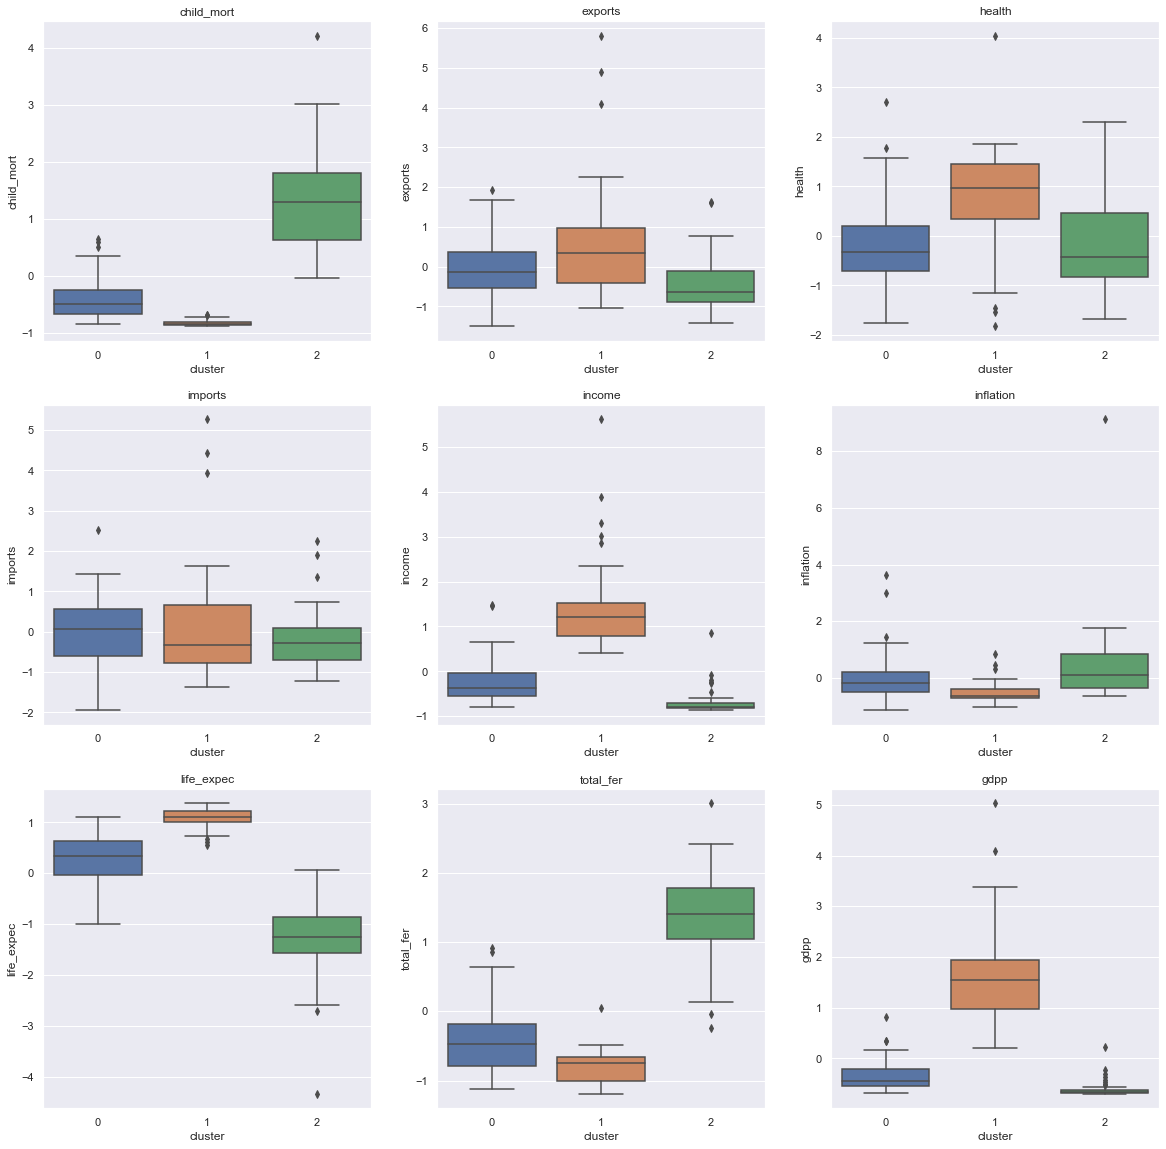

In [54]:
# Boxplot for each varible
l=['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize=(20,20))
for i in range(len(l)):
    plt.subplot(3,3,i+1)
    sns.boxplot(clustered_data_standardized['cluster'],clustered_data_standardized[l[i]])
    plt.title(l[i])

In [73]:
grouped_standardized = clustered_data_standardized.groupby("cluster").mean()
grouped_standardized

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,-0.406453,-0.031653,-0.224471,0.024162,-0.251770,-0.017167,0.254734,-0.424343,-0.354481
1,-0.827449,0.645080,0.727411,0.190639,1.484243,-0.484921,1.079579,-0.791877,1.615995
2,1.360218,-0.437533,-0.155984,-0.189204,-0.686894,0.402111,-1.282180,1.364944,-0.604242


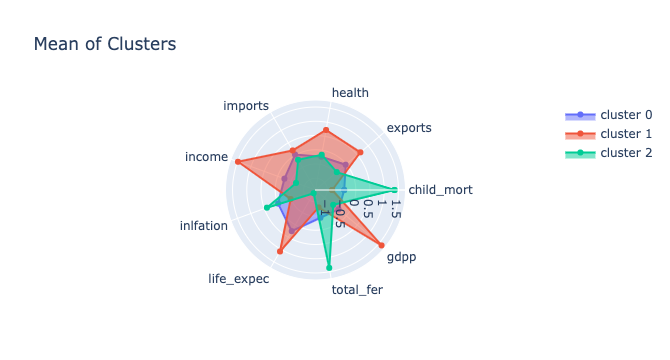

In [89]:
# Radar chart on the mean values of each cluster

variables = ['child_mort', 'exports', 'health', 'imports', 'income', 'inlfation', 'life_expec', 'total_fer', 'gdpp']
variables = [*variables, variables[0]]

cluster_0 = grouped_standardized.iloc[0]
cluster_1 = grouped_standardized.iloc[1]
cluster_2 = grouped_standardized.iloc[2]

cluster_0 = [*cluster_0, cluster_0[0]]
cluster_1 = [*cluster_1, cluster_1[0]]
cluster_2 = [*cluster_2, cluster_2[0]]

fig = go.Figure(
    data=[
        go.Scatterpolar(r=cluster_0, theta=variables, fill='toself', name = 'cluster 0'),
        go.Scatterpolar(r=cluster_1, theta=variables, fill='toself', name = 'cluster 1'),
        go.Scatterpolar(r=cluster_2, theta=variables, fill='toself', name = 'cluster 2')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Mean of Clusters'),
        polar={'radialaxis':{'visible': True}},
        showlegend=True
    )
)

fig

From the charts above, child mortality rate, income, life expectancy, fertility rate, gdpp are driving the clustering because they do not have much overlap.

In [57]:
# Select columns for 3D visualization on standardized data
seleted_columns = clustered_data_standardized.loc[:, ['child_mort', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'cluster']]
seleted_columns_0 = seleted_columns[seleted_columns['cluster'] == 0]
seleted_columns_1 = seleted_columns[seleted_columns['cluster'] == 1]
seleted_columns_2 = seleted_columns[seleted_columns['cluster'] == 2]
seleted_columns_2.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,cluster
0,1.291532,-0.808245,0.157336,-1.619092,1.902882,-0.679180,2
3,2.007808,-0.585043,1.387054,-1.179234,2.128151,-0.516268,2
17,1.808842,-0.797319,-0.654410,-0.987502,1.598107,-0.667961,2
21,0.353908,-0.200033,0.107996,-1.517586,-0.045030,-0.361949,2
25,1.933196,-0.817611,-0.092213,-1.427359,1.936010,-0.677976,2


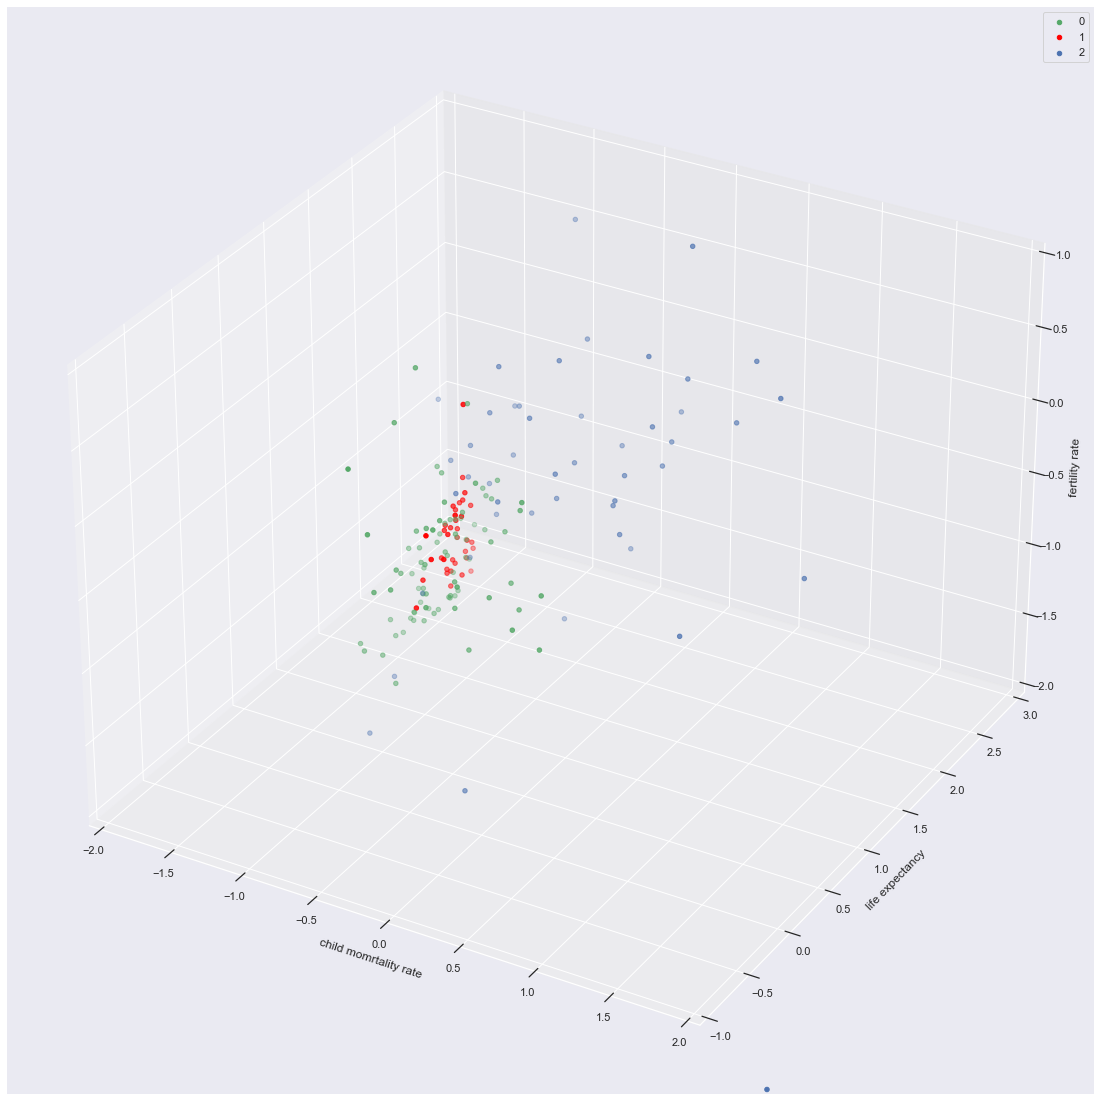

In [58]:
# 3D scatter plot for x=child_mort, y=life_expec, z=total_fer
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(projection='3d')
ax.set_xlim(-2,2)
ax.set_ylim(-1,3)
ax.set_zlim(-2,1)
ax.scatter3D(seleted_columns_0['child_mort'], 
             seleted_columns_0['life_expec'], 
             seleted_columns_0['total_fer'], 
             color = "g",
             label = "0"
             )
ax.scatter3D(seleted_columns_1['child_mort'], 
             seleted_columns_1['life_expec'], 
             seleted_columns_1['total_fer'], 
             color = "red",
             label = "1"
             )
ax.scatter3D(seleted_columns_2['child_mort'], 
             seleted_columns_2['life_expec'], 
             seleted_columns_2['total_fer'], 
             color = "b",
             label = "2"
             )
plt.legend(loc="upper right")
ax.set_xlabel('child momrtality rate')
ax.set_ylabel('life expectancy')
ax.set_zlabel('fertility rate')
plt.show()

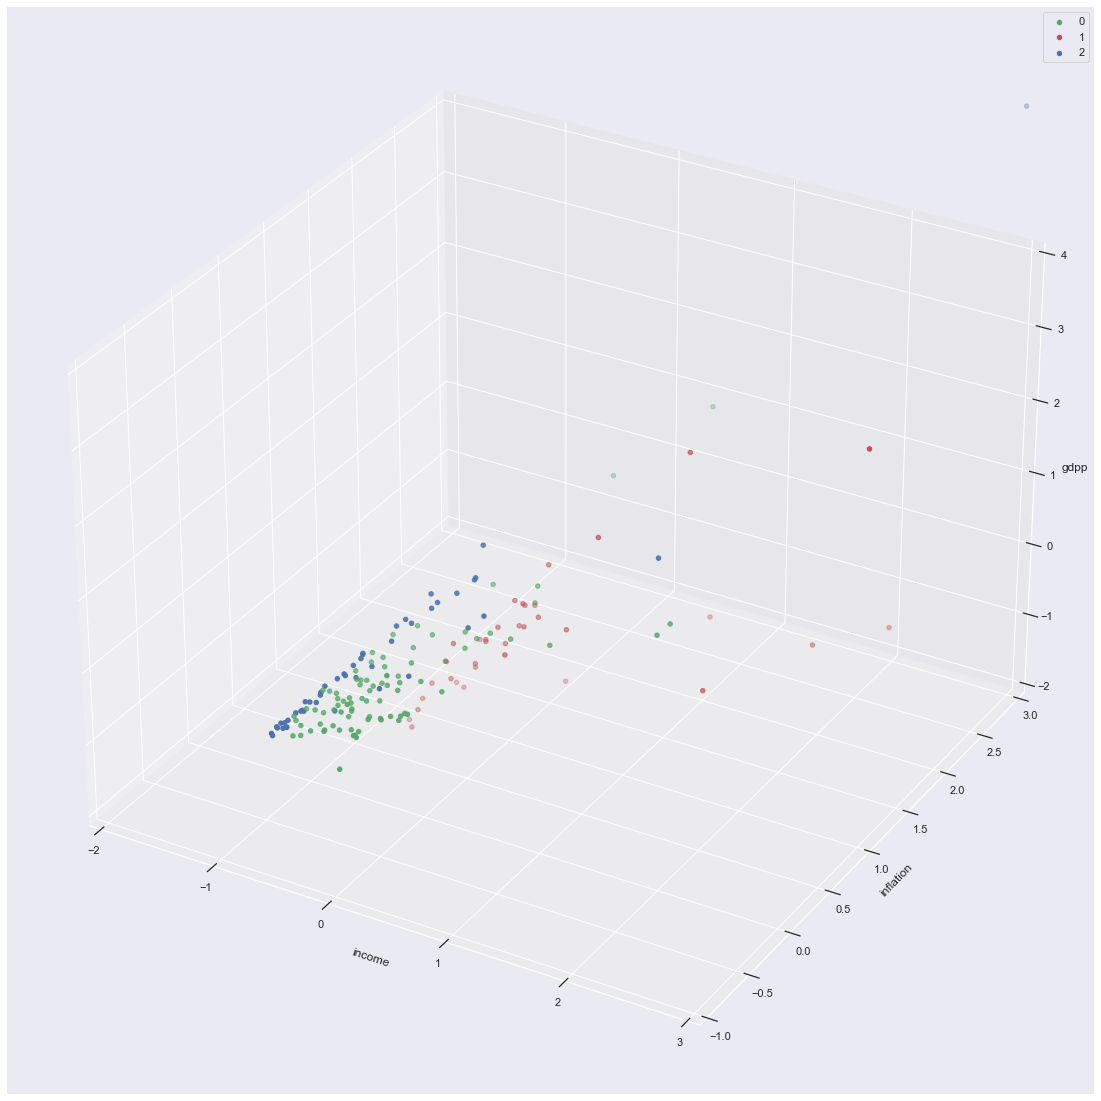

In [59]:
# 3D scatter plot for x=income, y=inflation, z=gdpp
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(projection='3d')
ax.set_xlim(-2,3)
ax.set_ylim(-1,3)
ax.set_zlim(-2,4)
ax.scatter3D(seleted_columns_0['income'], 
             seleted_columns_0['inflation'], 
             seleted_columns_0['gdpp'], 
             color = "g",
             label = "0"
             )
ax.scatter3D(seleted_columns_1['income'], 
             seleted_columns_1['inflation'], 
             seleted_columns_1['gdpp'], 
             color = "r",
             label = "1"
             )
ax.scatter3D(seleted_columns_2['income'], 
             seleted_columns_2['inflation'], 
             seleted_columns_2['gdpp'], 
             color = "b",
             label = "2"
             )
plt.legend(loc="upper right")
ax.set_xlabel('income')
ax.set_ylabel('inflation')
ax.set_zlabel('gdpp')
plt.show()

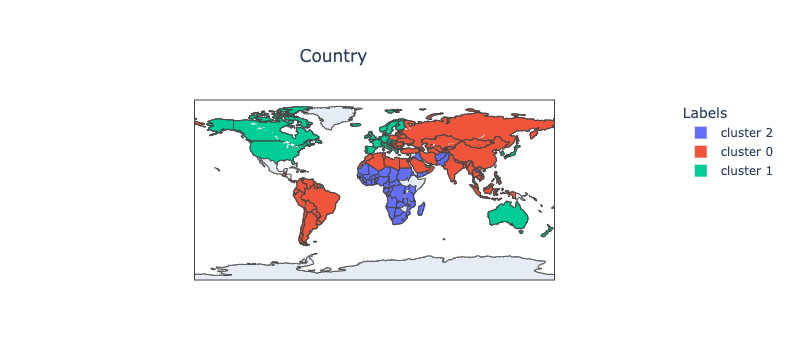

In [68]:
# Image is in WorldMap.png

#Convert "cluster" column from numerical to categorical
clustered_data['cluster'].loc[clustered_data['cluster'] == 0] = 'cluster 0'
clustered_data['cluster'].loc[clustered_data['cluster'] == 1] = 'cluster 1'
clustered_data['cluster'].loc[clustered_data['cluster'] == 2] = 'cluster 2'

# Visualize clusters on world map
fig = px.choropleth(clustered_data[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Country',
                    color = clustered_data['cluster'],  
                   )

fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

In [220]:
clustered_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,cluster 0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,cluster 2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,cluster 2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,cluster 0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,cluster 2


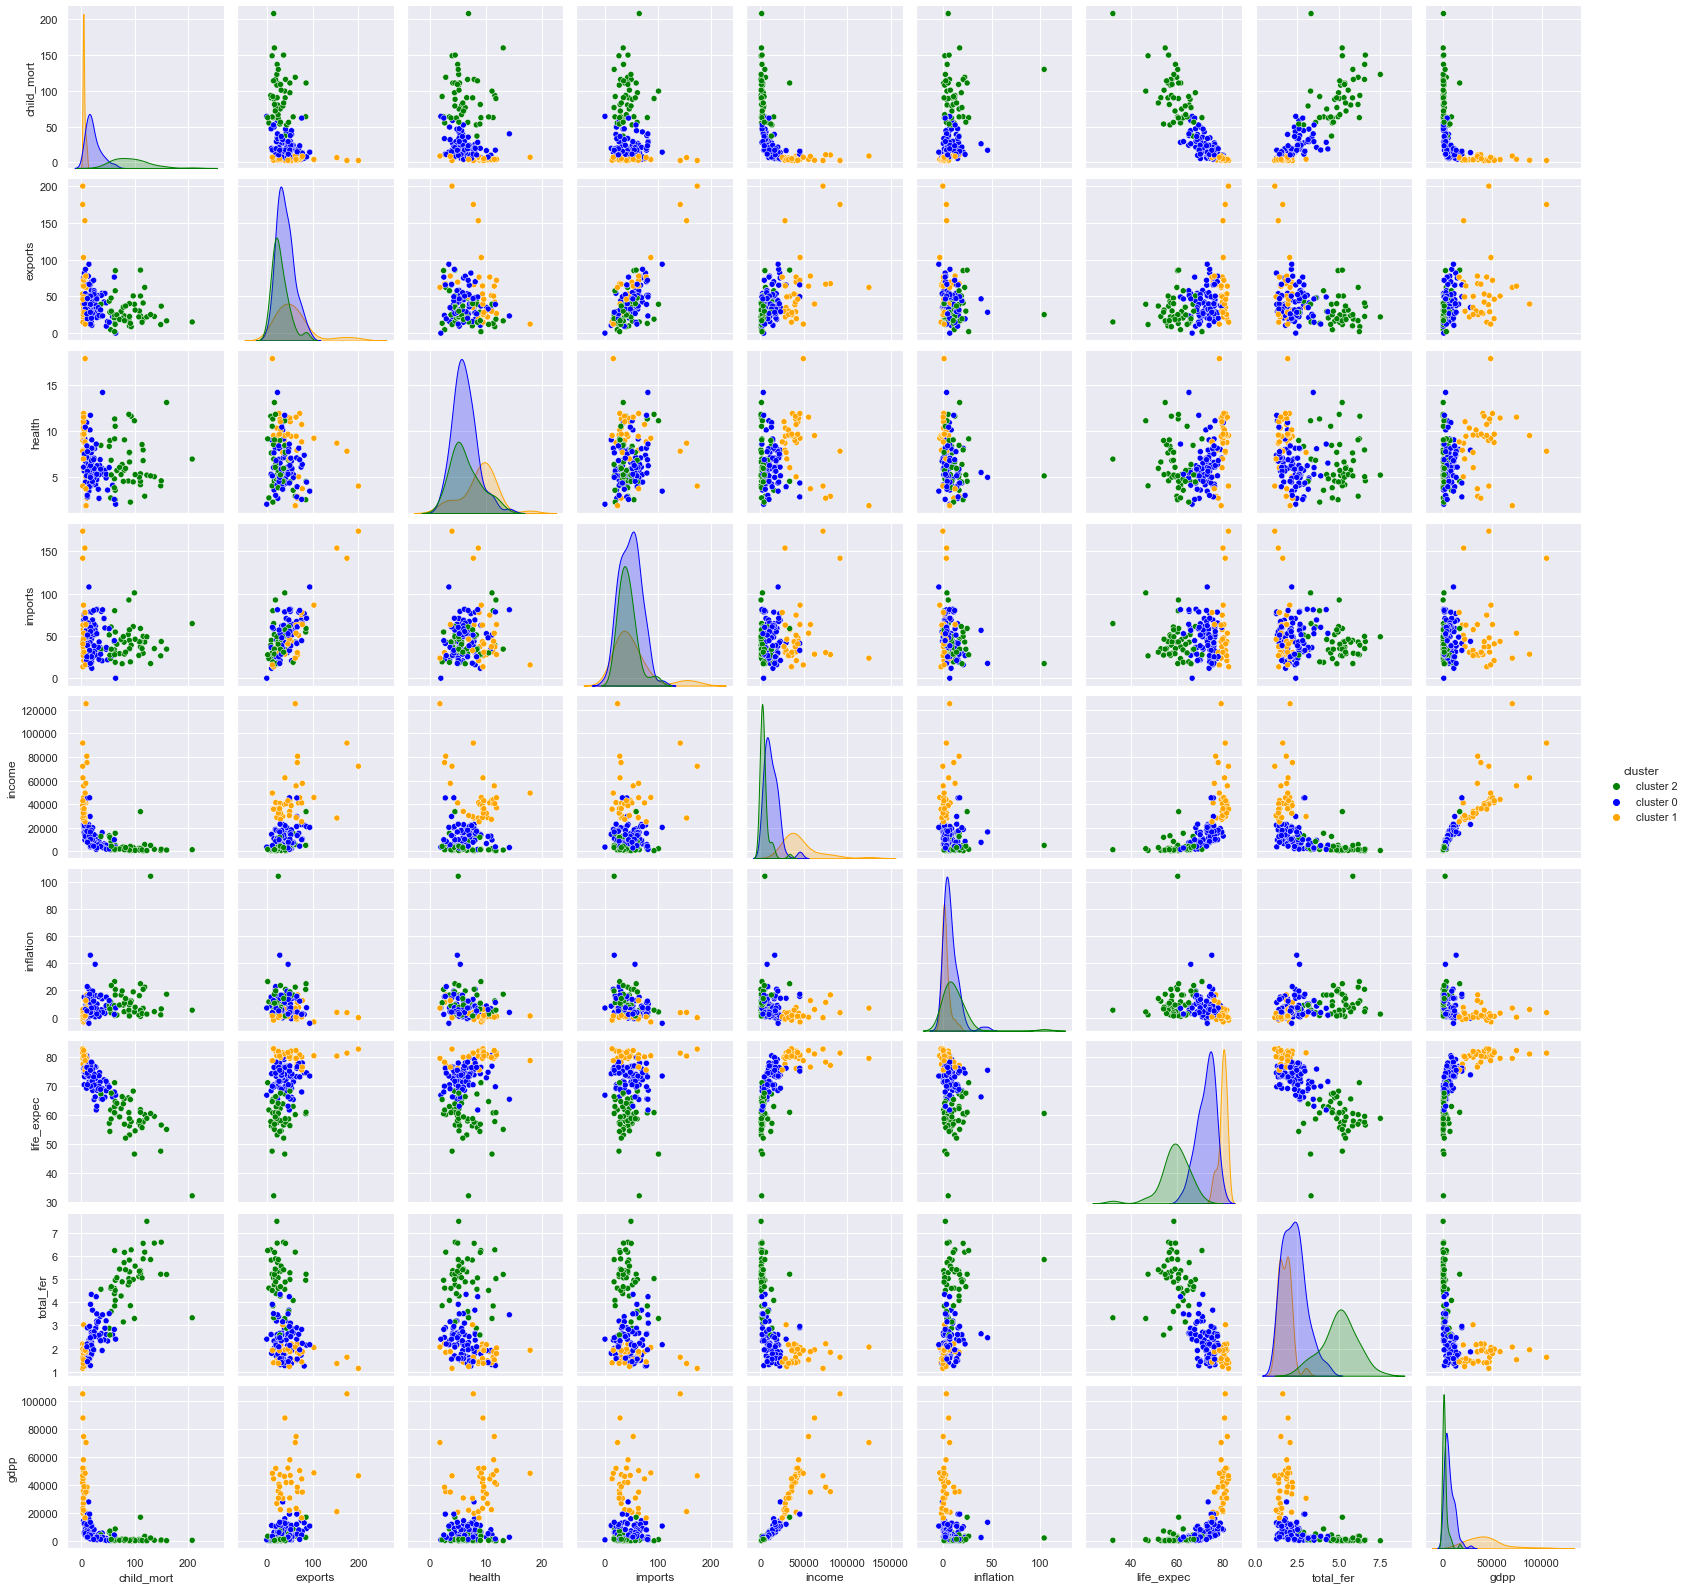

In [69]:
# Matrix plot for each variable coloured in clusters, and density curve of the 3 clusters.
sns.pairplot(clustered_data, hue='cluster', palette={'cluster 0':'blue', 'cluster 1':'orange', 'cluster 2':'green'})